### **ARIMA and SARIMAX**

ARIMA (AutoRegressive Integrated Moving Average) and SARIMAX (Seasonal AutoRegressive Integrated Moving-Average with eXogenous regressors) are two powerful and widely used time series models for forecasting and analysis. While ARIMA is suitable for non-seasonal and stationary time series, SARIMAX extends ARIMA by incorporating seasonality and exogenous variables.

---

### **1. ARIMA Model**

ARIMA is a forecasting model that combines three components:
1. **AutoRegressive (AR)**: Captures the relationship between an observation and a certain number of lagged observations (past values).
2. **Integrated (I)**: Refers to the differencing of raw observations to make the time series stationary.
3. **Moving Average (MA)**: Models the relationship between an observation and a residual error from a moving average model applied to lagged observations.

The general form of the ARIMA model is denoted as **ARIMA(p, d, q)**, where:
- \( p \): The number of lag observations included in the model (AR order).
- \( d \): The number of times the data has been differenced to achieve stationarity (I order).
- \( q \): The size of the moving average window (MA order).

#### **Steps to Build an ARIMA Model**
1. **Check Stationarity**: Use techniques like the ADF (Augmented Dickey-Fuller) test to determine if the series is stationary. If not, differencing may be required.
2. **Determine Parameters (p, d, q)**: Use tools like the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots to identify the orders.
3. **Fit the Model**: Train the ARIMA model with the identified parameters.
4. **Evaluate and Forecast**: Assess the model using metrics like AIC, BIC, and residual analysis, then forecast future values.

#### **Advantages of ARIMA**
- Handles both AR and MA components.
- Effective for short-term forecasting.
- Suitable for non-stationary series with no seasonality.

#### **Limitations of ARIMA**
- Assumes no seasonality in data.
- Requires the series to be stationary.
- Parameter tuning can be complex and computationally expensive.

---

### **2. SARIMAX Model**

SARIMAX extends ARIMA by incorporating:
1. **Seasonality**: It models seasonal patterns explicitly using seasonal differencing and seasonal autoregressive/moving average terms.
2. **Exogenous Variables (X)**: Allows the inclusion of additional predictors (external variables) that influence the target series.

The general form is **SARIMAX(p, d, q)(P, D, Q, s)**, where:
- \( p, d, q \): Similar to ARIMA, representing the non-seasonal AR, I, and MA terms.
- \( P, D, Q \): Seasonal counterparts of AR, I, and MA terms.
- \( s \): The periodicity of the seasonal cycle (e.g., 12 for monthly data).

#### **Key Features of SARIMAX**
1. **Seasonality**:
   - Seasonal differencing (\( D \)) is applied to remove recurring patterns in the data.
   - Seasonal AR (\( P \)) and MA (\( Q \)) terms model the relationships within the seasonal cycle.
   
2. **Exogenous Variables**:
   - External predictors (e.g., holiday effects, economic indicators) are included to improve forecasting accuracy.

#### **Steps to Build a SARIMAX Model**
1. **Identify Seasonality**:
   - Use seasonal decomposition (e.g., STL decomposition) or domain knowledge to determine the periodicity (\( s \)).
   
2. **Determine Parameters**:
   - Use ACF and PACF for both seasonal and non-seasonal components to identify \( p, d, q, P, D, Q, \) and \( s \).

3. **Fit the Model**:
   - Use SARIMAX from libraries like `statsmodels` or `pmdarima` for implementation.

4. **Evaluate and Forecast**:
   - Analyze residuals, AIC/BIC scores, and forecast accuracy.

---

### **Comparison Between ARIMA and SARIMAX**

| Feature             | ARIMA                      | SARIMAX                                |
|---------------------|----------------------------|----------------------------------------|
| Seasonality         | Not handled               | Explicitly modeled                    |
| Exogenous Variables | Not included              | Can incorporate external predictors    |
| Complexity          | Simpler                   | More complex with additional parameters |
| Use Case            | Non-seasonal data         | Seasonal data with potential external influences |

---

### **Key Concepts Related to ARIMA and SARIMAX**

1. **Stationarity**:
   - Stationarity is crucial for ARIMA/SARIMAX models. A stationary series has a constant mean, variance, and autocovariance over time.
   - Differencing (\( d \)) helps make a series stationary.

2. **ACF and PACF**:
   - ACF measures the correlation between a time series and its lagged values.
   - PACF shows the partial correlation, accounting for other lags in between.
   - Used to identify the appropriate values of \( p \) and \( q \).

3. **Overfitting**:
   - Using excessively high orders for \( p \), \( d \), \( q \), \( P \), \( D \), or \( Q \) can lead to overfitting, where the model fits noise rather than actual patterns.

4. **Model Diagnostics**:
   - Residuals should behave like white noise (uncorrelated, normally distributed with zero mean).
   - Use diagnostic plots (e.g., Q-Q plot, residual ACF) to validate assumptions.

5. **Forecasting Accuracy**:
   - Use metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or Mean Absolute Percentage Error (MAPE) to assess forecasting accuracy.

---

### **Applications of ARIMA and SARIMAX**
1. **Finance**: Stock price and return prediction.
2. **Economics**: Forecasting GDP, inflation rates, and unemployment.
3. **Retail**: Demand and sales forecasting.
4. **Weather**: Temperature and rainfall prediction.
5. **Healthcare**: Disease trend analysis and patient forecasting.

---

### **Conclusion**

ARIMA and SARIMAX are foundational tools in time series forecasting. ARIMA provides a robust framework for non-seasonal data, while SARIMAX extends its capabilities to handle seasonality and incorporate external factors. Understanding when and how to use these models, along with proper diagnostics and parameter tuning, ensures effective time series analysis and accurate forecasting.

# Let's see the Programming approach.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

### We can see that we have one Null values. Let's find and drop the NaN value since it's just one.

In [4]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
# Drop the NaN

df_airline.dropna(axis=0,inplace=True)

In [6]:
# Check for NaN Values

df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


We can see that our month is of `object` datatype, we need to fix that.

In [8]:
# Let's convert to date time

df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [9]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [11]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


**From the above we can see that we have column index starting from `0`. We need to convert the `Month` column to index. Converting the date column to an index creates a DateTimeIndex, which allows pandas to treat the data as a time series. This enables efficient time-based operations like slicing by date, aggregating data over time periods, and using time series-specific plotting tools.**

In [10]:
# Ler's convert date to index

df_airline.set_index('Month',inplace=True)

In [11]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


### We now have the date as our index we can now proceed.

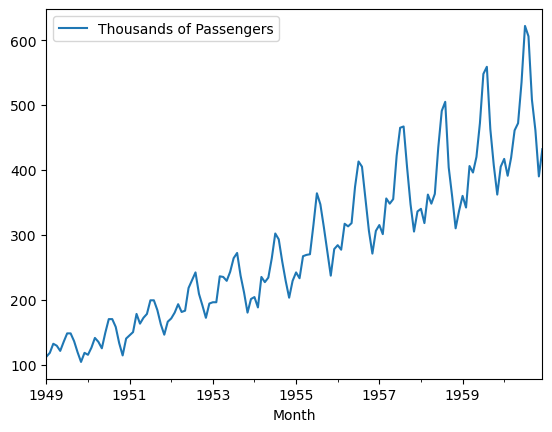

In [15]:
# Let's plot the data

df_airline.plot()
plt.show()

### Let's now use the `Dicky fuller test` which is `adfuller` in statsmodel.

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

### ler's test the above function to see what we have.

In [18]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060498
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### From our output we can see that our data is not `Stationary` so we need to work on it. To make the data stationary we start using `Differencing`, we'll do `Difference by 1 day`

In [19]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [20]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


### Now ler's drop the NaN value that resulted from the shift.

In [21]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700047
p- value: 0.05421329028382478
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### We can see from the above output that we still have a `non-stationary`. We'll do more shift.

In [22]:
## Use Techniques Differencing

df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [23]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468513
p- value: 2.7328918500142026e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


### We can see that we now have a stationary data. Interesting!!!

**Now we have seen how this works for a month, let's see how it will work for a year since we are talking about seasonal data.**

In [24]:
## Using 12 months Techniques Differencing

df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [25]:

adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


### Good! We have a stationary data.

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

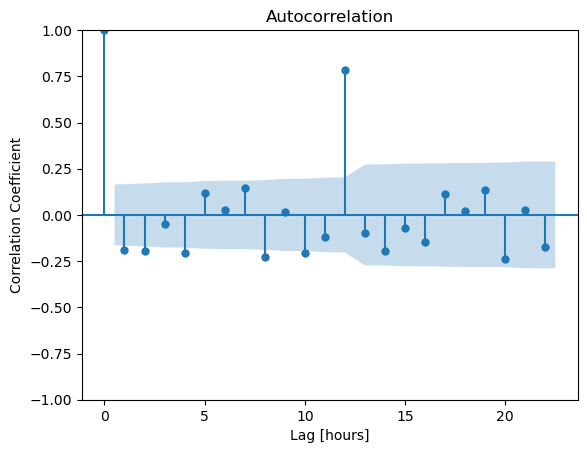

In [ ]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient")
plt.show()

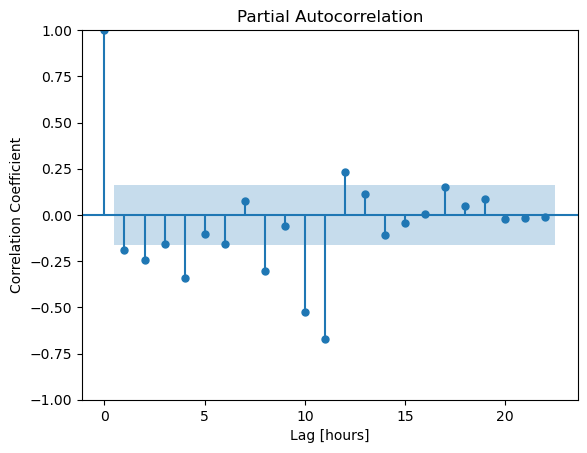

In [89]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient")
plt.show()

### Let's plot for the 12 months.

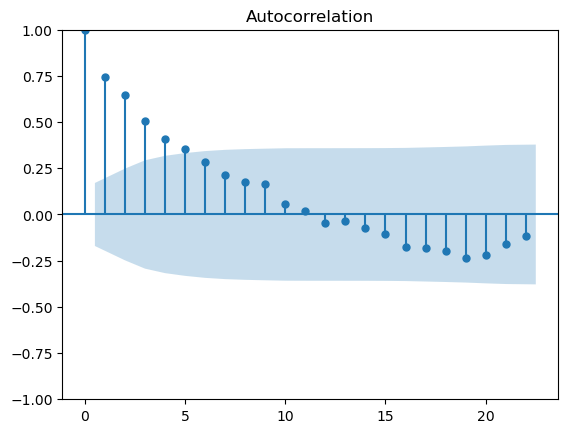

In [35]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
plt.show()

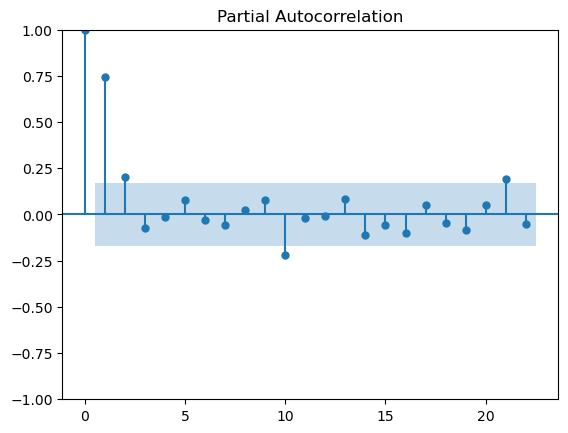

In [36]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())
plt.show()

In [37]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [38]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [39]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [40]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [41]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


### Let's create out ARIMA model.

In [60]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [61]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [62]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(0,2,0))

/home/chukwuemeka-james/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/chukwuemeka-james/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/chukwuemeka-james/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [63]:
model_Arima_fit=model_ARIMA.fit()

In [64]:
fitted_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                      ARIMA(0, 2, 0)   Log Likelihood                -385.792
Date:                     Fri, 27 Dec 2024   AIC                            773.584
Time:                             08:30:38   BIC                            775.991
Sample:                         01-01-1949   HQIC                           774.550
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       714.5858    102.414      6.977      0.000     513.858     915.314
===================================================================================
Ljung-Box (L1) (Q):                   4.59   Jarque-Bera (JB):                 1.74
Prob(Q):                              0.03   Prob(JB):                         0.42
Heteroskedasticity (H):               3.19   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Explanation of the Output: ARIMA and SARIMAX

#### **Model Summary**
1. **Model Type and Framework**:
   - The model shown is an **ARIMA(0, 2, 0)** model. This specifies:
     - \(p=0\): No autoregressive terms.
     - \(d=2\): The data is differenced twice to achieve stationarity.
     - \(q=0\): No moving average terms.
   - Even though the output mentions **SARIMAX Results**, this does not mean a seasonal model was used. The underlying framework for ARIMA in `statsmodels` uses the **SARIMAX (Seasonal ARIMA with Exogenous Variables)** implementation, which generalizes ARIMA models. The "SARIMAX Results" label is a consequence of this unified framework, and it includes ARIMA models as a subset. 

2. **Dependent Variable**: 
   - The dependent variable is `Thousands of Passengers`, indicating the model is trying to fit the time series of passenger counts over time.

3. **Number of Observations**: 
   - There are 84 data points in the time series, spanning from **January 1949 to December 1955**.

4. **Covariance Type**:
   - The covariance type used is **opg (Outer Product of Gradients)**, a method for estimating the standard errors of the coefficients.

---

#### **Model Fit Statistics**
1. **Log Likelihood**: 
   - A measure of model fit, with a higher value indicating a better fit to the data. Here, the log-likelihood is **-385.792**.

2. **AIC (Akaike Information Criterion)**:
   - A metric to compare model quality, penalizing model complexity. A lower AIC value indicates a better model. The AIC is **773.584**.

3. **BIC (Bayesian Information Criterion)**:
   - Similar to AIC but penalizes complexity more strongly for larger datasets. The BIC is **775.991**.

4. **HQIC (Hannan-Quinn Information Criterion)**:
   - Another model selection criterion, balancing fit and complexity. The HQIC is **774.550**.

---

#### **Model Coefficients**
1. **sigma2 (Variance)**:
   - The estimated variance of the residuals (errors) is **714.5858**. 
   - A smaller variance indicates that the model is better at capturing the data's behavior.

2. **Standard Error**:
   - Indicates the uncertainty in the estimate of the variance. Here, the standard error is **102.414**.

3. **Z-Statistic and P-Value**:
   - The Z-statistic (\(z = 6.977\)) measures the significance of the variance.
   - The P-value (\(P < 0.0001\)) confirms that the variance is statistically significant.

4. **Confidence Interval**:
   - The 95% confidence interval for the variance is **[513.858, 915.314]**.

---

#### **Diagnostics**
1. **Ljung-Box (L1)**:
   - This test checks for autocorrelation in residuals.
   - \(Q = 4.59\) with \(P(Q) = 0.03\) suggests there may be some autocorrelation at lag 1.

2. **Jarque-Bera (JB)**:
   - Tests whether residuals are normally distributed.
   - \(JB = 1.74\) and \(P(JB) = 0.42\) indicate that the residuals are likely normal.

3. **Heteroskedasticity (H)**:
   - Measures whether the variance of residuals is constant.
   - \(H = 3.19\) with \(P(H) < 0.05\) suggests heteroskedasticity, meaning the residual variance changes over time.

4. **Skew and Kurtosis**:
   - Skew measures asymmetry (\(0.31\)): A value close to 0 suggests residuals are nearly symmetric.
   - Kurtosis measures tail heaviness (\(3.36\)): A value near 3 suggests near-normality.

---

### ARIMAX vs. SARIMAX
- **ARIMAX**:
  - ARIMA models can include **exogenous variables** (ARIMAX), allowing the time series to be influenced by external predictors. Your model does not include any exogenous variables, so it is a standard ARIMA model.
  
- **SARIMAX**:
  - SARIMAX extends ARIMA to include **seasonal components** and **exogenous variables**. In your case, these components are turned off because you are using a non-seasonal ARIMA(0, 2, 0) model.
  - The output format as "SARIMAX Results" is purely due to the `statsmodels` library's design, which generalizes ARIMA as a subset of SARIMAX.

---

### Summary
- This output corresponds to an **ARIMA(0, 2, 0)** model, estimated using the SARIMAX framework.
- The model shows that differencing twice was necessary to make the time series stationary.
- The diagnostics indicate a good fit overall, but there may be slight heteroskedasticity and residual autocorrelation at lag 1.
- Despite the "SARIMAX Results" label, no seasonal or exogenous components are included—this is a standard ARIMA model.

In [65]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [66]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


### Let's make prdiction

In [67]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [68]:
pred

1956-01-01     319.0
1956-02-01     360.0
1956-03-01     401.0
1956-04-01     442.0
1956-05-01     483.0
1956-06-01     524.0
1956-07-01     565.0
1956-08-01     606.0
1956-09-01     647.0
1956-10-01     688.0
1956-11-01     729.0
1956-12-01     770.0
1957-01-01     811.0
1957-02-01     852.0
1957-03-01     893.0
1957-04-01     934.0
1957-05-01     975.0
1957-06-01    1016.0
1957-07-01    1057.0
1957-08-01    1098.0
1957-09-01    1139.0
1957-10-01    1180.0
1957-11-01    1221.0
1957-12-01    1262.0
1958-01-01    1303.0
1958-02-01    1344.0
1958-03-01    1385.0
1958-04-01    1426.0
1958-05-01    1467.0
1958-06-01    1508.0
1958-07-01    1549.0
1958-08-01    1590.0
1958-09-01    1631.0
1958-10-01    1672.0
1958-11-01    1713.0
1958-12-01    1754.0
1959-01-01    1795.0
1959-02-01    1836.0
1959-03-01    1877.0
1959-04-01    1918.0
1959-05-01    1959.0
1959-06-01    2000.0
1959-07-01    2041.0
1959-08-01    2082.0
1959-09-01    2123.0
1959-10-01    2164.0
1959-11-01    2205.0
1959-12-01   

In [69]:
residuals

Month
1956-01-01     -35.0
1956-02-01     -83.0
1956-03-01     -84.0
1956-04-01    -129.0
1956-05-01    -165.0
1956-06-01    -150.0
1956-07-01    -152.0
1956-08-01    -201.0
1956-09-01    -292.0
1956-10-01    -382.0
1956-11-01    -458.0
1956-12-01    -464.0
1957-01-01    -496.0
1957-02-01    -551.0
1957-03-01    -537.0
1957-04-01    -586.0
1957-05-01    -620.0
1957-06-01    -594.0
1957-07-01    -592.0
1957-08-01    -631.0
1957-09-01    -735.0
1957-10-01    -833.0
1957-11-01    -916.0
1957-12-01    -926.0
1958-01-01    -963.0
1958-02-01   -1026.0
1958-03-01   -1023.0
1958-04-01   -1078.0
1958-05-01   -1104.0
1958-06-01   -1073.0
1958-07-01   -1058.0
1958-08-01   -1085.0
1958-09-01   -1227.0
1958-10-01   -1313.0
1958-11-01   -1403.0
1958-12-01   -1417.0
1959-01-01   -1435.0
1959-02-01   -1494.0
1959-03-01   -1471.0
1959-04-01   -1522.0
1959-05-01   -1539.0
1959-06-01   -1528.0
1959-07-01   -1493.0
1959-08-01   -1523.0
1959-09-01   -1660.0
1959-10-01   -1757.0
1959-11-01   -1843.0
1959-12

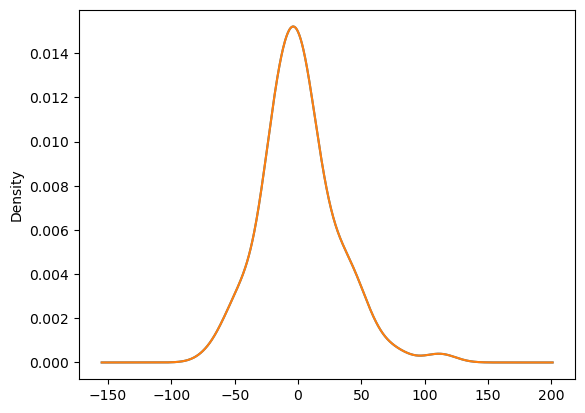

In [71]:
model_Arima_fit.resid.plot(kind='kde')
plt.show()

In [72]:
test_data['Predicted_ARIMA']=pred

/tmp/ipykernel_6328/95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


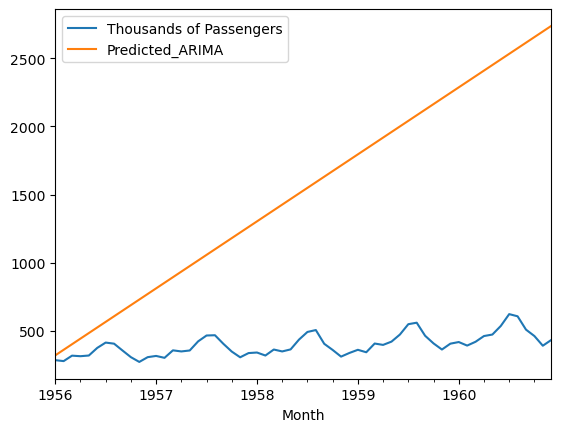

In [73]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()
plt.show()

### Remember what the data looks like below.

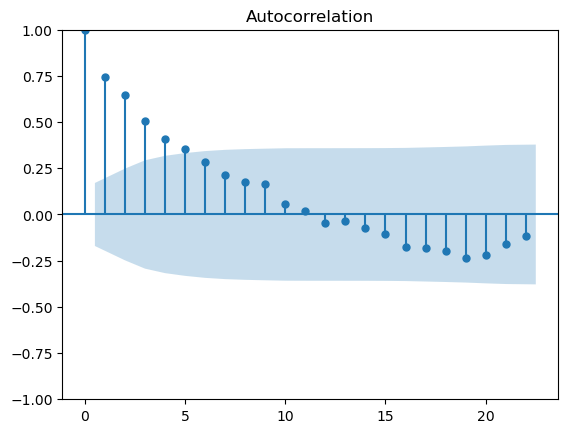

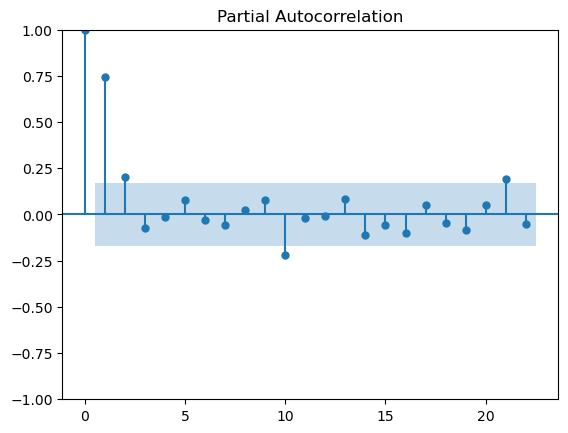

In [74]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())
plt.show()

### Let's create SARIMAX

In [75]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [76]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

/home/chukwuemeka-james/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/chukwuemeka-james/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [78]:
model_SARIMA_fit=model_SARIMA.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18261D+00    |proj g|=  4.32163D-02

At iterate    5    f=  3.17613D+00    |proj g|=  3.18802D-02

At iterate   10    f=  3.17248D+00    |proj g|=  2.87532D-03


 This problem is unconstrained.



At iterate   15    f=  3.16990D+00    |proj g|=  1.51284D-02

At iterate   20    f=  3.16245D+00    |proj g|=  1.30416D-02

At iterate   25    f=  3.15869D+00    |proj g|=  3.72414D-03

At iterate   30    f=  3.15804D+00    |proj g|=  2.70759D-03

At iterate   35    f=  3.15800D+00    |proj g|=  5.65400D-04

At iterate   40    f=  3.15797D+00    |proj g|=  4.47204D-03

At iterate   45    f=  3.15779D+00    |proj g|=  6.11599D-03

At iterate   50    f=  3.15763D+00    |proj g|=  1.70407D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57      1     0     0   1.704D-03   3.158D+00
  F =   3.15762752190

/home/chukwuemeka-james/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [79]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.241
Date:                             Fri, 27 Dec 2024   AIC                            548.481
Time:                                     09:13:56   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.639
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6000      0.940      0.638      0.523      -1.243       2.443
ar.L2          0.8317      0.233      3.574      0.000       0.376       1.288
ar.L3         -0.4546      0.897     -0.507      0.612      -2.212       1.303
ma.L1          0.1820      1.182      0.154      0.878      -2.135       2.499
ma.L2         -0.5363      1.282     -0.418      0.676      -3.049       1.976
ma.L3         -0.0986      0.390     -0.253      0.801      -0.864       0.667
ma.L4         -0.1270      0.345     -0.368      0.713      -0.803       0.549
ma.L5          0.2471      0.361      0.684      0.494      -0.461       0.956
sigma2        87.6942     83.133      1.055      0.291     -75.243     250.632
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,2574.0
1960-09-01,508.0,-98.0,-82.0,45.0,2615.0
1960-10-01,461.0,-47.0,51.0,54.0,2656.0
1960-11-01,390.0,-71.0,-24.0,28.0,2697.0
1960-12-01,432.0,42.0,113.0,27.0,2738.0


In [81]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [82]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

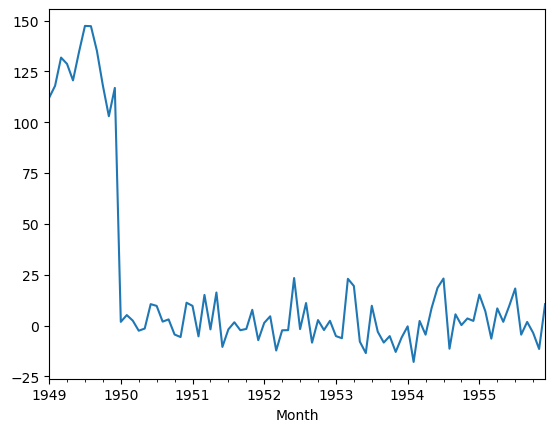

In [83]:
model_SARIMA_fit.resid.plot()
plt.show()

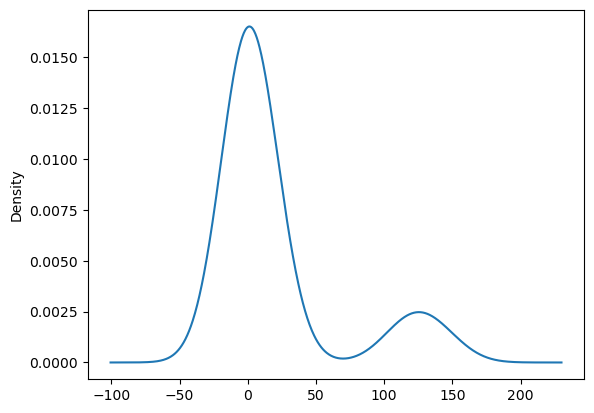

In [84]:
model_SARIMA_fit.resid.plot(kind='kde')
plt.show()

In [85]:
test_data['Predicted_SARIMA']=pred_Sarima

/tmp/ipykernel_6328/1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [86]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,319.0,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,360.0,NaN
1956-03-01,317.0,40.0,47.0,50.0,401.0,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,442.0,NaN
1956-05-01,318.0,5.0,9.0,48.0,483.0,NaN
1956-06-01,374.0,56.0,51.0,59.0,524.0,NaN
1956-07-01,413.0,39.0,-17.0,49.0,565.0,403.409686
1956-08-01,405.0,-8.0,-47.0,58.0,606.0,385.086095
1956-09-01,355.0,-50.0,-42.0,43.0,647.0,349.457955


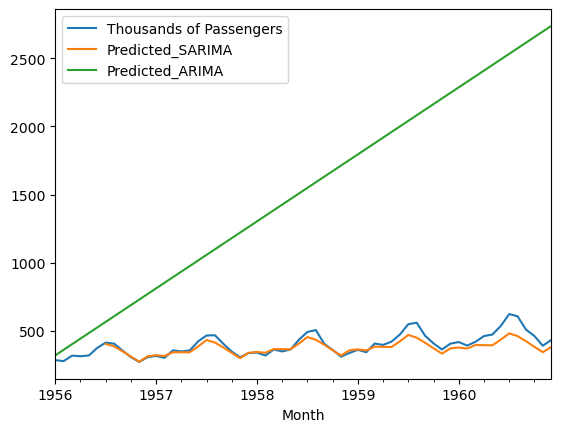

In [87]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()
plt.show()

### From this notebook we have learnt that:

- ARIMA can not work on seasonal data, it can work on STOCK data.
- SARIMAX can work on seasonal data.